# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> AC209a Twitter Project - Group 15

## Experiments with Twitter API

**Harvard University**<br/>
**Fall 2018**<br/>
**Project Authors**: Claire Stolz, Matthew Stewart, Yiming Qin & Tianning Zhao <br>
**Assigned Teaching Fellow**: Brandon Lee

<hr style="height:2pt">

In [1]:
%%capture
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### Important packages

1. `Tweepy` - Twitter API - http://docs.tweepy.org/en/v3.5.0/api.html#tweepy-api-twitter-api-wrapper

2. `nltk` - Natural language processing library - http://www.nltk.org/howto/twitter.html

3. `twython` - Python wrapper for the Twitter API

4. `jsonpickle` - converts Python objects into JSON

5. `scikit-learn` - Python machine learning library

https://github.com/Jefferson-Henrique/GetOldTweets-python

In [2]:
%%capture
!pip install --upgrade jsonpickle tweepy

import sys
import jsonpickle
import os
import numpy as np
import pandas as pd
import tweepy
import nltk
import pandas as pd
import json
import sklearn
import datetime
from datetime import datetime
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pandas.io.json import json_normalize

import warnings
warnings.filterwarnings('ignore')

# Baseline Model  with Multiple Features

In [3]:
bot_df = pd.read_csv(r"bot_df_final.csv",index_col='User ID')
user_df = pd.read_csv(r"user_df_final.csv",index_col='User ID')

In [4]:
bot_df['bot']=1
user_df['bot']=0

In [5]:
total_df = bot_df.append(user_df)

In [6]:
train_data, test_data = train_test_split(total_df, test_size = 0.3, random_state=99)

In [7]:
Y_train=train_data['bot']
Y_test=test_data['bot']
X_train=train_data.drop('bot',axis=1)
X_test=test_data.drop('bot',axis=1)

In [8]:
def normalize(df,df_train):
    result = df.copy()
    for feature_name in df_train.columns:
        max_value = df_train[feature_name].max()
        min_value = df_train[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [9]:
X_train_scaled=normalize(X_train,X_train)
X_test_scaled=normalize(X_test,X_train)

## Logistic Regression

In [10]:
logreg = LogisticRegression(C=100000,fit_intercept=True).fit(X_train_scaled,Y_train)
logreg_train = logreg.score(X_train_scaled, Y_train)
#accuracy_score(Y_train,logreg.predict(X_train_scaled), normalize=True)
print('Accuracy of logistic regression model on training set is {:.3f}'.format(logreg_train))
# Classification error on test set
#logreg_test = accuracy_score(logreg.predict(X_test_scaled), Y_test, normalize=True)
logreg_test = logreg.score(X_test_scaled, Y_test)
print('Accuracy of logistic regression model on the test set is {:.3f}'.format(logreg_test))

Accuracy of logistic regression model on training set is 0.776
Accuracy of logistic regression model on the test set is 0.775


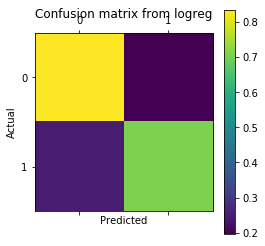

In [11]:
y_pred_logreg= logreg.predict(X_test_scaled)
df_confusion=pd.DataFrame(confusion_matrix(Y_test,y_pred_logreg))

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_confusion.index.name='Actual'
df_confusion.columns.name='Predicted'

def plot_confusion_matrix(df_confusion, title='Confusion matrix from logreg', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)

In [12]:
# Logistic regression w/ quadratic + interaction terms + regularization
polynomial_logreg_estimator = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=True),
    LogisticRegressionCV(multi_class="ovr", penalty='l2', cv=5, max_iter=10000))
linearLogCVpoly = polynomial_logreg_estimator.fit(X_train_scaled, Y_train)
# Compare results
print('Polynomial-logistic accuracy: train={:.1%}, test={:.1%}'.format(
    linearLogCVpoly.score(X_train_scaled, Y_train), linearLogCVpoly.score(X_test_scaled, Y_test)))
linearLogCVpoly_train = linearLogCVpoly.score(X_train_scaled, Y_train)
linearLogCVpoly_test = linearLogCVpoly.score(X_test_scaled, Y_test)

Polynomial-logistic accuracy: train=80.9%, test=80.0%


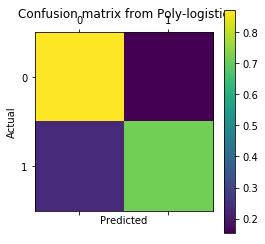

In [85]:
y_pred_PolyL = linearLogCVpoly.predict(X_test_scaled)

df_confusion=pd.DataFrame(confusion_matrix(Y_test,y_pred_PolyL))

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_confusion.index.name='Actual'
df_confusion.columns.name='Predicted'

def plot_confusion_matrix(df_confusion, title='Confusion matrix from Poly-logistic', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)

The logistic regression model does a pretty good job of separating bots from legimitate users with just two features. Once more features are used, the model should be able to predict bots with an even higher accuracy.

## LDA and QDA Model

In this section we run LDA and QDA models to classify the users into either bots or legitimate users.

In [86]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train_scaled, Y_train)
qda.fit(X_train_scaled, Y_train)
lda.predict(X_test_scaled)
qda.predict(X_test_scaled)

print('LDA accuracy train={:.1%}, test: {:.1%}'.format(
    lda.score(X_train_scaled, Y_train), lda.score(X_test_scaled, Y_test)))

lda_train = lda.score(X_train_scaled, Y_train)
lda_test = lda.score(X_test_scaled, Y_test)

print('QDA accuracy train={:.1%}, test: {:.1%}'.format(
    qda.score(X_train_scaled, Y_train), qda.score(X_test_scaled, Y_test)))

qda_train = qda.score(X_train_scaled, Y_train)
qda_test = qda.score(X_test_scaled, Y_test)

LDA accuracy train=70.6%, test: 70.8%
QDA accuracy train=70.8%, test: 71.1%


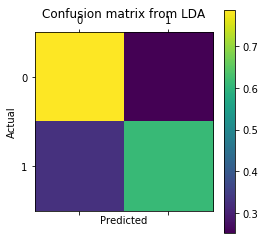

In [87]:
y_pred_lda = lda.predict(X_test_scaled)

df_confusion=pd.DataFrame(confusion_matrix(Y_test,y_pred_lda))

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_confusion.index.name='Actual'
df_confusion.columns.name='Predicted'

def plot_confusion_matrix(df_confusion, title='Confusion matrix from LDA', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)

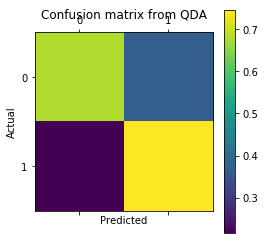

In [88]:
y_pred_qda = qda.predict(X_test_scaled)

df_confusion=pd.DataFrame(confusion_matrix(Y_test,y_pred_qda))

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_confusion.index.name='Actual'
df_confusion.columns.name='Predicted'

def plot_confusion_matrix(df_confusion, title='Confusion matrix from QDA', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)

We see here that the LDA and QDA models perform relatively well at separating this data. However, it did not perform as well as the logistic regression method.

## Random forest

In [89]:
ntrees = 50
rf = RandomForestClassifier(n_estimators=ntrees , max_depth=15, max_features='auto')
rf.fit(X_train_scaled, Y_train)
rf_train =rf.score(X_train_scaled, Y_train)
rf_test =rf.score(X_test_scaled, Y_test)

print('RF accuracy train={:.1%}, test: {:.1%}'.format(rf_train,rf_test))
y_pred = rf.predict(X_test_scaled)

df_confusion=pd.DataFrame(confusion_matrix(Y_test,y_pred  ))

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_confusion.index.name='Actual'
df_confusion.columns.name='Predicted'

RF accuracy train=99.4%, test: 91.4%


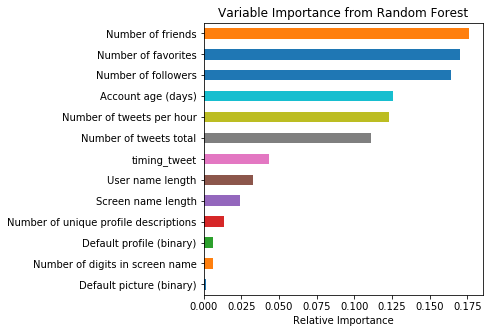

In [90]:
plt.figure(figsize=(5,5))
plt.title('Variable Importance from Random Forest')
plt.xlabel('Relative Importance')
pd.Series(rf.feature_importances_,index=list(X_train_scaled)).sort_values().plot(kind="barh")

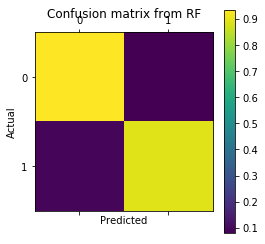

In [91]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix from RF', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)

## Adaboost

In [92]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=800, learning_rate=0.01)
adaboost.fit(X_train_scaled, Y_train);

Adaboost Test Accuracy: 94.58%


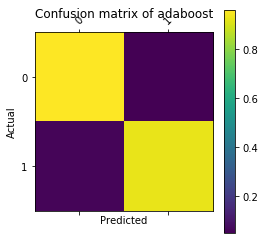

In [93]:
y_pred = adaboost.predict(X_test_scaled)
pred_adaboost = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, pred_adaboost)

adaboost_train = adaboost.score(X_train_scaled, Y_train)
adaboost_test = adaboost.score(X_test_scaled, Y_test)

print("Adaboost Test Accuracy: %.2f%%" % (accuracy * 100.0))
df_confusion=pd.DataFrame(confusion_matrix(Y_test,y_pred  ))

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_confusion.index.name='Actual'
df_confusion.columns.name='Predicted'

def plot_confusion_matrix(df_confusion, title='Confusion matrix of adaboost', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)


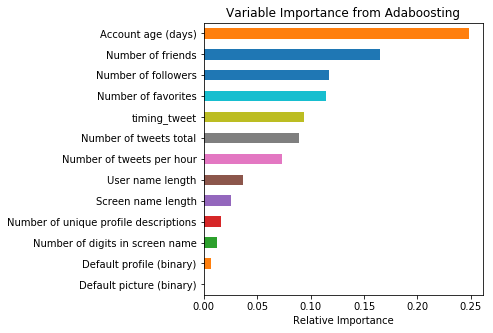

In [94]:
plt.figure(figsize=(5,5))
plt.title('Variable Importance from Adaboosting')
plt.xlabel('Relative Importance')
pd.Series(adaboost.feature_importances_,index=list(X_train_scaled)).sort_values().plot(kind="barh")

Accuracy: 92.22%


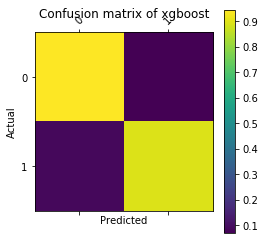

In [95]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

xgb = xgb.XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.01).fit(X_train_scaled, Y_train)
y_pred = xgb.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions)

xgb_train = xgb.score(X_train_scaled, Y_train)
xgb_test = xgb.score(X_test_scaled, Y_test)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
df_confusion=pd.DataFrame(confusion_matrix(Y_test,predictions))

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_confusion.index.name='Actual'
df_confusion.columns.name='Predicted'

def plot_confusion_matrix(df_confusion, title='Confusion matrix of xgboost', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)

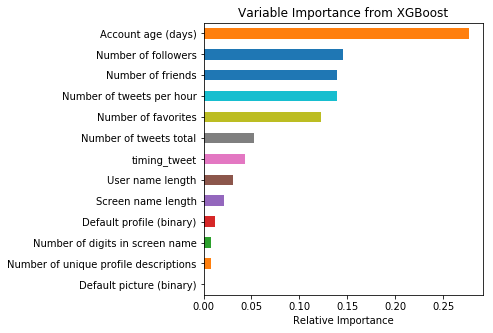

In [96]:
plt.figure(figsize=(5,5))
plt.title('Variable Importance from XGBoost')
plt.xlabel('Relative Importance')
pd.Series(xgb.feature_importances_,index=list(X_train_scaled)).sort_values().plot(kind="barh")

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores_mean=[]
scores_std=[]

k_number=np.arange(1,40)

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    score_mean= cross_val_score(knn,X_train_scaled,Y_train,cv=5).mean()
    score_std=cross_val_score(knn,X_train_scaled,Y_train,cv=5).std()
    scores_mean.append(score_mean)

In [99]:
max_score_k=max(scores_mean)
best_k=scores_mean.index(max(scores_mean))+1
print('Best K=',best_k, 'with a max CV score of',max_score_k)

knn_best_k = KNeighborsClassifier(n_neighbors = best_k)
knn_best_k.fit(X_train_scaled,Y_train);

pred_best_k = knn_best_k.predict(X_test_scaled)

print('test accuracy',accuracy_score(Y_test, pred_best_k))

knn_best_k_train = knn_best_k.score(X_train_scaled, Y_train)
knn_best_k_test = knn_best_k.score(X_test_scaled, Y_test)

Best K= 8 with a max CV score of 0.7114063374922827
test accuracy 0.718296224588577


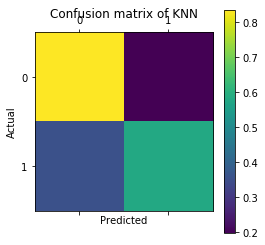

In [100]:
df_confusion=pd.DataFrame(confusion_matrix(Y_test,pred_best_k ))

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_confusion.index.name='Actual'
df_confusion.columns.name='Predicted'

def plot_confusion_matrix(df_confusion, title='Confusion matrix of KNN', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)

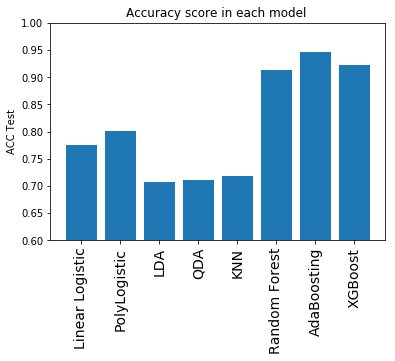

In [101]:
acc_scores=[accuracy_score(logreg.predict(X_test_scaled), Y_test),linearLogCVpoly.score(X_test_scaled, Y_test),lda.score(X_test_scaled, Y_test),qda.score(X_test_scaled, Y_test),accuracy_score(Y_test, pred_best_k),rf.score(X_test_scaled, Y_test),accuracy_score(Y_test, pred_adaboost),accuracy_score(Y_test, predictions)]

xx = [1,2,3,4,5,6,7,8]
index_name=['Linear Logistic','PolyLogistic', 'LDA','QDA','KNN','Random Forest','AdaBoosting','XGBoost']
plt.bar(xx, acc_scores)
plt.ylim(0.6,1)
plt.title('Accuracy score in each model ')
plt.ylabel('ACC Test')
plt.xticks(xx,index_name,rotation=90,fontsize = 14);

## Support Vector Machines

In this section we will use a support vector machine technique to separate the data.

In [29]:
def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 6), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='gray', alpha=0.3)
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

In [30]:
def fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, C):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='linear')
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    #plot_decision_boundary(x_train, y_train, model, \
    #                       'C = ' + str(C)\
    #                       + ', train acc = ' + str(tr_acc)\
    #                       + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    #sv_indices = model.support_ # retrieve the support vector indices
    #ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return tr_acc, ts_acc

In [ ]:
# Fit and plot for different 'C' values
tr1, ts1 = fit_and_plot_svm_for_c(X_train, Y_train, X_test, Y_test, 0.1)
print(tr1,ts1)

tr2, ts2 = fit_and_plot_svm_for_c(X_train, Y_train, X_test, Y_test, 0.5)
print(tr2,ts2)

tr3, ts3 = fit_and_plot_svm_for_c(X_train, Y_train, X_test, Y_test, 1)
print(tr3,ts3)

tr4, ts4 = fit_and_plot_svm_for_c(X_train, Y_train, X_test, Y_test, 10)
print(tr4,ts4)

tr5, ts5 = fit_and_plot_svm_for_c(X_train, Y_train, X_test, Y_test, 100)
print(tr5,ts5)

tr6, ts6 = fit_and_plot_svm_for_c(X_train, Y_train, X_test, Y_test, 1000)
print(tr6,ts6)

#plt.tight_layout()

In [ ]:
def fit_and_plot_svm_for_poly_c(X_train_log, Y_train, X_test_log, Y_test, C, degree = 2):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='poly', degree=degree)
    model.fit(X_train, Y_train)
    
    # Train and test error
    tr_acc = model.score(X_train, Y_train)
    ts_acc = model.score(X_test, Y_test)

    # Plot decision boundary
    #plot_decision_boundary(X_train, Y_train, model, \
    #                       'C = ' + str(C)\
    ##                       + ', train acc = ' + str(tr_acc)\
     #                      + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    #sv_indices = model.support_ # retrieve the support vector indices
    #ax.scatter(X_train_log[sv_indices, 0], X_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return tr_acc, ts_acc

In [ ]:
# Fit and plot for different 'C' values when polynomial degree is 2
#fig, ax = plt.subplots(2, 3, figsize = (15, 10))

deg = 4

tr7, ts7 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 0.5, degree = deg)
print(tr7,ts7)

tr8, ts8 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 1, degree = deg)
print(tr8,ts8)

tr9, ts9 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 10, degree = deg)
print(tr9,ts9)

tr10, ts10  = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 100, degree = deg)
print(tr10,ts10)

tr11, ts11 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 1000, degree = deg)
print(tr11,ts11)

tr12, ts12 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 10000, degree = deg)
print(tr12,ts12)

#plt.tight_layout()

In [ ]:
# Fit and plot for different degrees for polynomial boundary...this takes a while
#fig, ax = plt.subplots(2, 2, figsize = (15, 10))

tr13,ts13 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 1000, degree = 1)
print(tr13,ts13)

tr14, ts14 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 1000, degree = 2)
print(tr14,ts14)

tr15, ts15 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 1000, degree = 3)
print(tr15,ts15)

tr16,ts16 = fit_and_plot_svm_for_poly_c(X_train, Y_train, X_test, Y_test, 1000, degree = 4)
print(tr16,ts16)

#plt.tight_layout()

In [ ]:
# What about other kernels?
def fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, C, kernel = 'rbf'):
    # Fit SVM model
    model = svm.SVC(C=C, kernel=kernel)
    model.fit(X_train, Y_train)
    
    # Train and test error
    tr_acc = model.score(X_train, Y_train)
    ts_acc = model.score(X_test, Y_test)

    # Plot decision boundary
    #plot_decision_boundary(x_train, y_train, model, \
    #                       'C = ' + str(C)\
    #                       + ', train acc = ' + str(tr_acc)\
    #                       + ', test acc = ' + str(ts_acc), ax, bounds)
   # 
    # Plot support vectors
    #sv_indices = model.support_ # retrieve the support vector indices
    #ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return tr_acc, ts_acc

In [ ]:
#fig, ax = plt.subplots(2, 3, figsize = (15, 10))

tr17, ts17 = fit_and_plot_svm_for_kernels(X_train, Y_train, X_test, Y_test, 100, kernel = "poly")
print(tr17,ts17)

tr18, ts18 = fit_and_plot_svm_for_kernels(X_train, Y_train, X_test, Y_test, 100, kernel = "rbf")
print(tr18,ts18)

tr19, ts19 = fit_and_plot_svm_for_kernels(X_train, Y_train, X_test, Y_test, 100, kernel = "sigmoid")
print(tr19,ts19)

tr20, ts20 = fit_and_plot_svm_for_kernels(X_train, Y_train, X_test, Y_test, 1000, kernel = "poly")
print(tr20,ts20)

tr21, ts21 = fit_and_plot_svm_for_kernels(X_train, Y_train, X_test, Y_test, 1000, kernel = "rbf")
print(tr21,ts21)

tr22, ts22 = fit_and_plot_svm_for_kernels(X_train, Y_train, X_test, Y_test, 1000, kernel = "sigmoid")
print(tr22, ts22)

#plt.tight_layout()

## Stacked Model

Model stacking is an efficient ensemble method in which the predictions, generated by using various machine learning algorithms, are used as inputs in a second-layer learning algorithm. This second-layer algorithm is trained to optimally combine the model predictions to form a new set of predictions. For example, when linear regression is used as second-layer modeling, it estimates these weights by minimizing the least square errors. However, the second-layer modeling is not restricted to only linear models; the relationship between the predictors can be more complex, opening the door to employing other machine learning algorithms.

![title](modelstacking.png)

Ensemble modeling and model stacking are especially popular in data science competitions, in which a sponsor posts a training set (which includes labels) and a test set (which does not include labels) and issues a global challenge to produce the best predictions of the test set for a specified performance criterion. The winning teams almost always use ensemble models instead of a single fine-tuned model. Often individual teams develop their own ensemble models in the early stages of the competition, and then join their forces in the later stages. 

Another popular data science competition is the KDD Cup. The following figure shows the winning solution for the 2015 competition, which used a three-stage stacked modeling approach. A similar approach will be trialed for this project to try and obtain maximal predictive capability.

![title](stackedapproach.png)

The figure shows that a diverse set of 64 single models were used to build the model library. These models are trained by using various machine learning algorithms. For example, the green boxes represent gradient boosting models (GBM), pink boxes represent neural network models (NN), and orange boxes represent factorization machines models (FM). You can see that there are multiple gradient boosting models in the model library; they probably vary in their use of different hyperparameter settings and/or feature sets.

A simple way to enhance diversity is to train models by using different machine learning algorithms. For example, adding a factorization model to a set of tree-based models (such as random forest and gradient boosting) provides a nice diversity because a factorization model is trained very differently than decision tree models are trained. For the same machine learning algorithm, you can enhance diversity by using different hyperparameter settings and subsets of variables. If you have many features, one efficient method is to choose subsets of the variables by simple random sampling.

Overfitting is an especially big problem in model stacking, because so many predictors that all predict the same target are combined. Overfitting is partially caused by this collinearity between the predictors. The most efficient techniques for training models (especially during the stacking stages) include using cross validation and some form of regularization. A good paper that outlines this procedure is [Stacked Ensemble Models for Improved Prediction Accuracy](https://support.sas.com/resources/papers/proceedings17/SAS0437-2017.pdf).

That paper also shows how you can generate a diverse set of models by various methods (such as forests, gradient boosted decision trees, factorization machines, and logistic regression) and then combine them with stacked ensemble techniques such regularized regression methods, gradient boosting, and hill climbing methods.

![title](levels.png)

Applying stacked models to real-world big data problems can produce greater prediction accuracy and robustness than do individual models. The model stacking approach is powerful and compelling enough to alter your initial data mining mindset from finding the single best model to finding a collection of really good complementary models. Of course, this method does involve additional cost both because you need to train a large number of models and because you need to use cross validation to avoid overfitting.

## Stacked Model

In this section we will try to implement a stacked model similar to that proposed in the "[Stacked Ensemble Models for Improved Prediction Accuracy](https://support.sas.com/resources/papers/proceedings17/SAS0437-2017.pdf)" paper.

In [102]:
# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC

### Pearson Correlation Heatmap

Let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

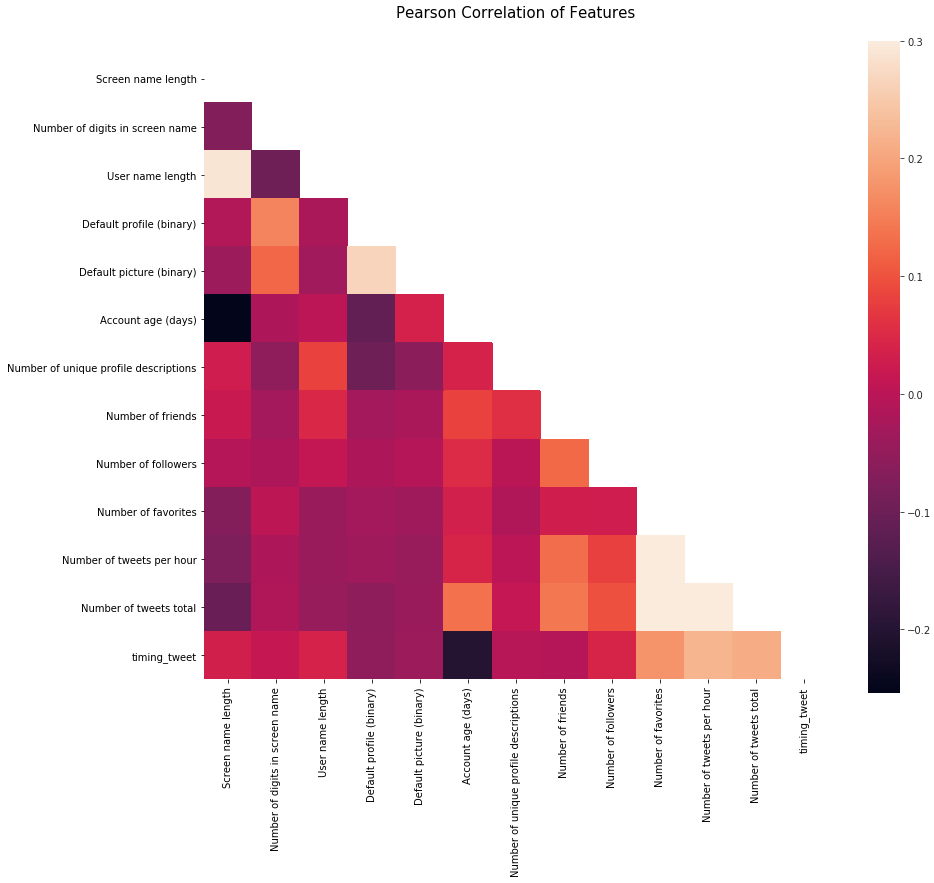

In [103]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
# Generate a mask for the upper triangle
corr = X_train_scaled.astype(float).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#mask = np.zeros_like(X_train_scaled)
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
#sns.heatmap(X_train_scaled.astype(float).corr(),linewidths=0.1,vmax=1.0,
#            square=True, cmap=colormap, linecolor='white', annot=True)

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here the most correlated features are that of `number of tweets per hour` and `number of tweets total` which are both correlated with `timing_tweet`. I'll still leave both features in because this correlation is still relatively low.

### Pairplots

Now let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us.

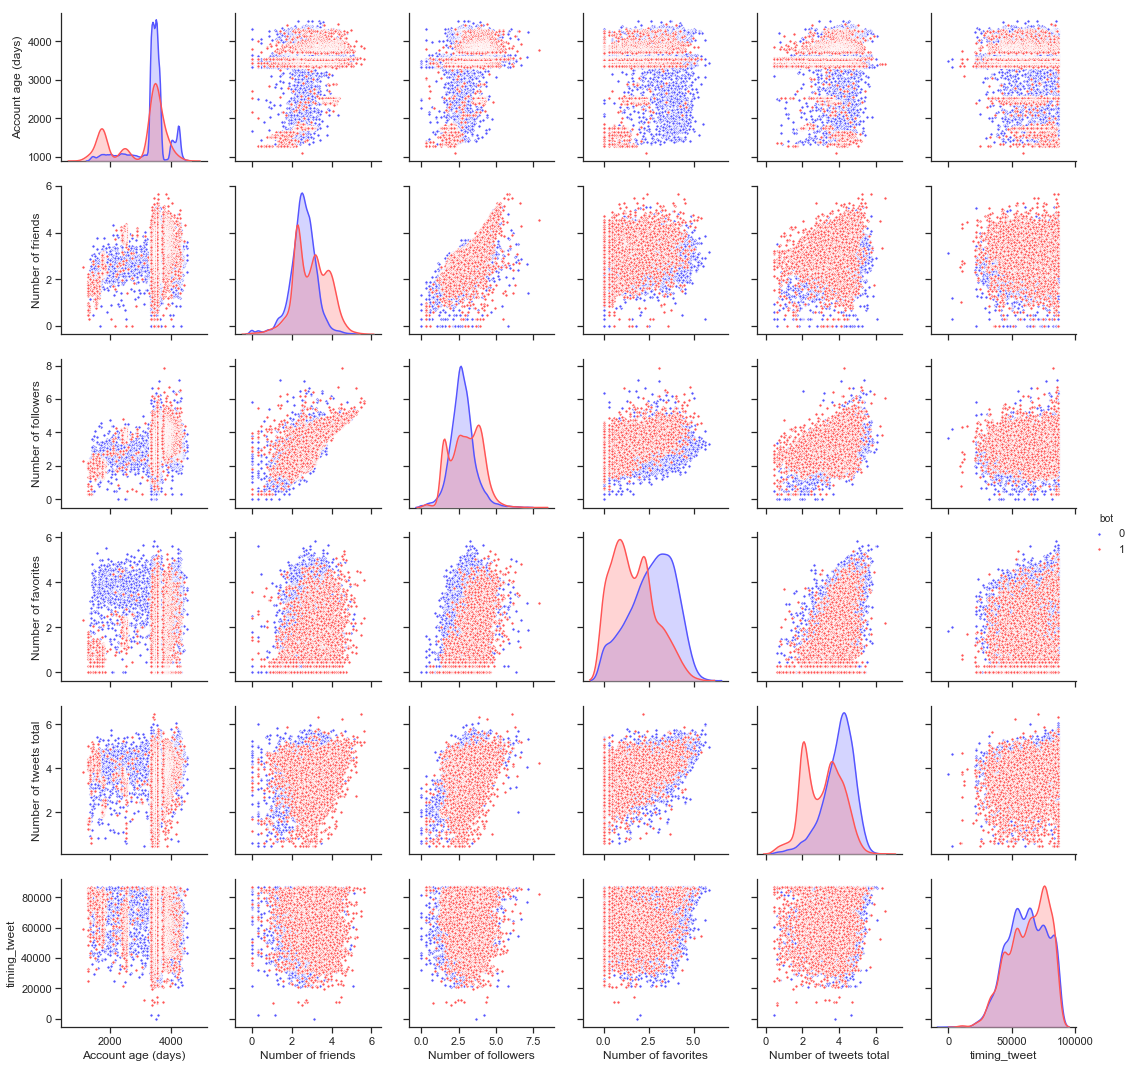

In [104]:
pairplot_df = total_df.copy()
pairplot_df['Number of friends'] = np.log10(pairplot_df['Number of friends'])
pairplot_df['Number of followers'] = np.log10(pairplot_df['Number of followers'])
pairplot_df['Number of favorites'] = np.log10(pairplot_df['Number of favorites'])
pairplot_df['Number of tweets total'] = np.log10(pairplot_df['Number of tweets total'])

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(pairplot_df, vars=[u'Account age (days)', 'Number of friends', u'Number of followers', u'Number of favorites', u'Number of tweets total', u'timing_tweet'],
                 hue='bot', palette = 'seismic',diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
#g.set(xticklabels=[])

## Helpers via Python Classes

In the section of code below, we essentially write a class SklearnHelper that allows one to extend the inbuilt methods (such as train, predict and fit) common to all the Sklearn classifiers. Therefore this cuts out redundancy as won't need to write the same methods five times if we wanted to invoke five different classifiers.

In [105]:
# Some useful parameters which will come in handy later on
ntrain = X_train_scaled.shape[0]
ntest = X_test_scaled.shape[0]
SEED = 99 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction

kf = KFold(n_splits = NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
            print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

**def init :** Python standard for invoking the default constructor for the class. This means that when you want to create an object (classifier), you have to give it the parameters of clf (what sklearn classifier you want), seed (random seed) and params (parameters for the classifiers).

The rest of the code are simply methods of the class which simply call the corresponding methods already existing within the sklearn classifiers. Essentially, we have created a wrapper class to extend the various Sklearn classifiers so that this should help us reduce having to write the same code over and over when we implement multiple learners to our stacker.

### Out-of-Fold Predictions

Stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

In [106]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):

        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]
        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

### Generating our Base First-Level Models

So now let us prepare five learning models as our first level classification. These models can all be conveniently invoked via the Sklearn library and are listed as follows:

- **Random Forest classifier**
- **Extra Trees classifier**
- **AdaBoost classifer**
- **Gradient Boosting classifer**
- **Support Vector Machine**

**Parameters**

**n_jobs :** Number of cores used for the training process. If set to -1, all cores are used.

**n_estimators :** Number of classification trees in your learning model ( set to 10 per default)

**max_depth :** Maximum depth of tree, or how much a node should be expanded. Beware if set to too high a number would run the risk of overfitting as one would be growing the tree too deep

**verbose :** Controls whether you want to output any text during the learning process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration.

In [107]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'sigmoid',
    'C' : 0.1
    }

logreg_params = {'C':100000, 'fit_intercept': True}
lda_params = {'store_covariance': True}
qda_params = {'store_covariance': True}
polylogreg_params = {}

Let us now create 5 objects that represent our 5 learning models via our Helper Sklearn Class we defined earlier.

In [108]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)
logreg_stack = SklearnHelper(clf=LogisticRegression, seed=SEED, params=logreg_params)
#lda_stack = SklearnHelper(clf=LinearDiscriminantAnalysis, params=lda_params)
#qda_stack = SklearnHelper(clf=QuadraticDiscriminantAnalysis, params=qda_params)
#polylogreg_stack = SklearnHelper(clf=polynomial_logreg_estimator, seed=SEED, params=polylogreg_params)

### Output of the First level Predictions

We now feed the training and test data into our 5 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.

In [109]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, X_train_scaled, Y_train, X_test_scaled) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,X_train_scaled, Y_train, X_test_scaled) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, X_train_scaled, Y_train, X_test_scaled) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,X_train_scaled, Y_train, X_test_scaled) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,X_train_scaled, Y_train, X_test_scaled) # Support Vector Classifier
logreg_oof_train, logreg_oof_test = get_oof(logreg_stack,X_train_scaled, Y_train, X_test_scaled) # Linear Logistic Regression
#lda_oof_train, lda_oof_test = get_oof(lda_stack,X_train_scaled, Y_train, X_test_scaled) # LDA
#qda_oof_train, qda_oof_test = get_oof(qda_stack,X_train_scaled, Y_train, X_test_scaled) # QDA
#polylogreg_oof_train, polylogreg_oof_test = get_oof(polylogreg_stack,X_train_scaled, Y_train, X_test_scaled) # Polynomial Logistic Regression

print("Training is complete")

Training is complete


### Feature importances generated from the different classifiers

Now having learned our the first-level classifiers, we can utilise a very nifty feature of the Sklearn models and that is to output the importances of the various features in the training and test sets with one very simple line of code.

As per the Sklearn documentation, most of the classifiers are built in with an attribute which returns feature importances by simply typing in .featureimportances. Therefore we will invoke this very useful attribute via our function earliand plot the feature importances as such

In [110]:
rf_feature = rf.feature_importances(X_train_scaled,Y_train);
et_feature = et.feature_importances(X_train_scaled, Y_train);
ada_feature = ada.feature_importances(X_train_scaled, Y_train);
gb_feature = gb.feature_importances(X_train_scaled,Y_train);

[0.01040077 0.00271345 0.02571925 0.00269657 0.00062294 0.11067271
 0.00524144 0.19651664 0.15383554 0.22888341 0.13083209 0.11240919
 0.01945599]
[0.1851489  0.02698042 0.11626441 0.02168347 0.00496865 0.31242358
 0.02762129 0.07809107 0.00762381 0.07623999 0.04850533 0.06264847
 0.03180063]
[0.008 0.014 0.012 0.002 0.    0.666 0.016 0.06  0.038 0.03  0.06  0.06
 0.034]
[5.58484420e-03 2.58457182e-03 6.06856077e-03 1.18974807e-03
 1.64445226e-04 2.16018516e-01 2.26869048e-03 2.54855733e-01
 1.05620892e-01 2.65655795e-01 7.26437428e-02 5.64419007e-02
 1.09025601e-02]


In [111]:
rf_feature = [0.01040077, 0.00271345, 0.02571925, 0.00269657, 0.00062294, 0.11067271, 0.00524144,
              0.19651664, 0.15383554, 0.22888341, 0.13083209, 0.11240919, 0.01945599]
et_feature = [0.1851489,  0.02698042, 0.11626441, 0.02168347, 0.00496865, 0.31242358, 0.02762129,
              0.07809107, 0.00762381, 0.07623999, 0.04850533, 0.06264847, 0.03180063]
ada_feature = [0.008, 0.014, 0.012, 0.002, 0.,    0.666, 0.016, 0.06,  0.038, 0.03,  0.06,  0.06, 0.034]
gb_feature = [5.58484420e-03, 2.58457182e-03, 6.06856077e-03, 1.18974807e-03, 1.64445226e-04,
              2.16018516e-01, 2.26869048e-03, 2.54855733e-01, 1.05620892e-01, 2.65655795e-01,
              7.26437428e-02, 5.64419007e-02, 1.09025601e-02]

In [112]:
cols = X_train_scaled.columns.values
display(cols)
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_feature,
     'Extra Trees  feature importances': et_feature,
      'AdaBoost feature importances': ada_feature,
    'Gradient Boost feature importances': gb_feature
    })

feature_dataframe

array(['Screen name length', 'Number of digits in screen name',
       'User name length', 'Default profile (binary)',
       'Default picture (binary)', 'Account age (days)',
       'Number of unique profile descriptions', 'Number of friends',
       'Number of followers', 'Number of favorites',
       'Number of tweets per hour', 'Number of tweets total',
       'timing_tweet'], dtype=object)

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features
0,0.008,0.185149,0.005585,0.010401,Screen name length
1,0.014,0.026980,0.002585,0.002713,Number of digits in screen name
2,0.012,0.116264,0.006069,0.025719,User name length
3,0.002,0.021683,0.001190,0.002697,Default profile (binary)
4,0.000,0.004969,0.000164,0.000623,Default picture (binary)
5,0.666,0.312424,0.216019,0.110673,Account age (days)
6,0.016,0.027621,0.002269,0.005241,Number of unique profile descriptions
7,0.060,0.078091,0.254856,0.196517,Number of friends
8,0.038,0.007624,0.105621,0.153836,Number of followers
9,0.030,0.076240,0.265656,0.228883,Number of favorites


In [113]:
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [114]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]


layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [115]:
# Create the new column containing the average of values
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,mean
0,0.008,0.185149,0.005585,0.010401,Screen name length,0.052284
1,0.014,0.026980,0.002585,0.002713,Number of digits in screen name,0.011570
2,0.012,0.116264,0.006069,0.025719,User name length,0.040013


### Plotly Barplot of Average Feature Importances

Having obtained the mean feature importance across all our classifiers, we can plot them into a Plotly bar plot as follows:

In [116]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

## Second-Level Predictions from the First-level Output

### First-level output as new features

Having now obtained our first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.

In [117]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel(),
        'Logistic Regression': logreg_oof_train.ravel()
    })
display(base_predictions_train.head())

base_predictions_test = pd.DataFrame( {'RandomForest': rf_oof_test.ravel(),
     'ExtraTrees': et_oof_test.ravel(),
     'AdaBoost': ada_oof_test.ravel(),
      'GradientBoost': gb_oof_test.ravel(),
        'Logistic Regression': logreg_oof_test.ravel()
    })
base_predictions_test.head()


,AdaBoost,ExtraTrees,GradientBoost,Logistic Regression,RandomForest
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


,AdaBoost,ExtraTrees,GradientBoost,Logistic Regression,RandomForest
0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


### Correlation Heatmap of the Second Level Training set

In [118]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [191]:
#x_train = np.concatenate(( rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train, logreg_oof_train), axis=1)
#x_test = np.concatenate(( rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test, logreg_oof_test), axis=1)
#x_train = base_predictions_train.mean(axis=1)
#x_test = base_predictions_test.mean(axis=1)
x_train = np.concatenate((0.4*ada_oof_train, 0.2*svc_oof_train, 0.2*rf_oof_train, 0.35*logreg_oof_train), axis=1)
x_test = np.concatenate((0.4*ada_oof_test, 0.2*svc_oof_test, 0.2*rf_oof_test, 0.35*logreg_oof_test), axis=1)
x_train = x_train.mean(axis=1).reshape(-1,1)
x_test = x_test.mean(axis=1).reshape(-1,1)

There have been quite a few articles and Kaggle competition winner stories about the merits of having trained models that are more uncorrelated with one another producing better scores. Having now concatenated and joined both the first-level train and test predictions as x_train and x_test, we can now fit a second-level learning model.

### Second level learning model via XGBoost

Here we choose the eXtremely famous library for boosted tree learning model, XGBoost. It was built to optimize large-scale boosted tree algorithms. For further information about the algorithm, check out the official documentation.

Anyways, we call an XGBClassifier and fit it to the first-level train and target data and use the learned model to predict the test data as follows:

In [192]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
    learning_rate = 0.001,
 n_estimators= 1000,
 max_depth= 5,
 min_child_weight= 1,
 gamma=0.8,                      
 subsample=0.7,
 colsample_bytree=0.9,
 objective= 'binary:hinge',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, Y_train)
predictions = gbm.predict(x_test)

Just a quick run down of the XGBoost parameters used in the model:

**max_depth :** How deep you want to grow your tree. Beware if set to too high a number might run the risk of overfitting.

**gamma :** minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.

**eta :** step size shrinkage used in each boosting step to prevent overfitting

In [193]:
gbm_train = gbm.score(x_train, Y_train)
gbm_test = gbm.score(x_test, Y_test)
print(gbm_test)

0.9286866731203615


## Blending

In this section we utilize the `mlens` package to develop a blended ensemble with 3 layers and more than 20 different classification techniques in order to achieve a truly superior predictive capability to the previous models. The blended model is also surprisingly fast given that it contains so many different methods, including many not previously discussed in AC209a such as gaussian process classifiers, MLP classifiers, extremely randomized tree classifiers, naive Bayes classifiers, and more.

The purpose of showing the blended model is to see what happens when you (quite literally) throw everything you have at the problem and see how well you do. In this case, we do surprisingly well, but trying to optimize the hyperparameters of this model would be a truly daunting task, and there is essentially no interpretability in this model. It is purely to obtain maximal accuracy for the given input data.

In [295]:
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from mlens.ensemble import BlendEnsemble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

ensemble = BlendEnsemble()
ensemble.add([SVR(C=.1), RandomForestClassifier(n_estimators=200, random_state=SEED), LogisticRegression(C=1),  ExtraTreesClassifier(max_depth=10,random_state=SEED), GradientBoostingClassifier(random_state=SEED), AdaBoostClassifier(random_state=SEED)])
#ensemble.add([SVC(C=1),GaussianProcessClassifier(random_state=SEED),LogisticRegression(C=1000000), GradientBoostingClassifier(random_state=SEED), AdaBoostClassifier(random_state=SEED)])
#ensemble.add([ RandomForestClassifier(n_estimators=100, random_state=SEED), GradientBoostingClassifier(random_state=SEED),GaussianProcessClassifier(random_state=SEED)])
#ensemble.add([SVC(C=1), AdaBoostClassifier(random_state=SEED)])
ensemble.add([xgb.XGBClassifier(random_state=SEED), RandomForestClassifier(n_estimators=200, random_state=SEED), GradientBoostingClassifier(random_state=SEED)])
ensemble.add_meta(xgb.XGBClassifier(random_state=SEED))

ensemble.fit(X_train_scaled, Y_train)
preds = ensemble.predict(X_test_scaled)
ensemble_test = accuracy_score(Y_test, preds)
ensemble_train = accuracy_score(Y_train, ensemble.predict(X_train_scaled))
print(ensemble_test)

0.9474023878670539


## Summary of Models

The following dataframe shows each of the tested models and its corresponding accuracy on the testing set.

In [296]:
dict_var = {#"training time": [dec_1_fit_time,random_1_fit_time,model_1_fit_time,model_xg1_fit_time,clf_1_fit_time,cat_1_fit_time],
            #"inference time": [dec_1_predict_time,random_1_predict_time,model_1_predict_time,model_xg1_predict_time,clf_1_predict_time,cat_1_predict_time],
            "test accuracy": [logreg_test, linearLogCVpoly_test, rf_test, knn_best_k_test ,lda_test,qda_test, adaboost_test, xgb_test, gbm_test, ensemble_test],
            "training accuracy": [logreg_train, linearLogCVpoly_train, rf_train, knn_best_k_train ,lda_train,qda_train, adaboost_train, xgb_train, gbm_train, ensemble_train],
            #"Cross validation": ['No','No','No','No','No','No']
           }
print("Performance comparison of the six methods:")
df_var = pd.DataFrame.from_dict(dict_var)
df_var.index= ['Linear LR', 'Polynomial LR', 'Random Forest', 'kNN', 'LDA', 'QDA', 'AdaBoost', 'XGBoost', 'Stacking (2nd-Level Model)', 'Blending (3rd-Level Model)']
display(df_var)

Performance comparison of the six methods:


,test accuracy,training accuracy
Linear LR,0.775411,0.776148
Polynomial LR,0.800581,0.808937
Random Forest,0.913520,0.993774
kNN,0.718296,0.772690
LDA,0.707648,0.705728
QDA,0.711197,0.708080
AdaBoost,0.945789,0.987548
XGBoost,0.922233,0.936359
Stacking (2nd-Level Model),0.928687,0.935667
Blending (3rd-Level Model),0.947402,0.954759


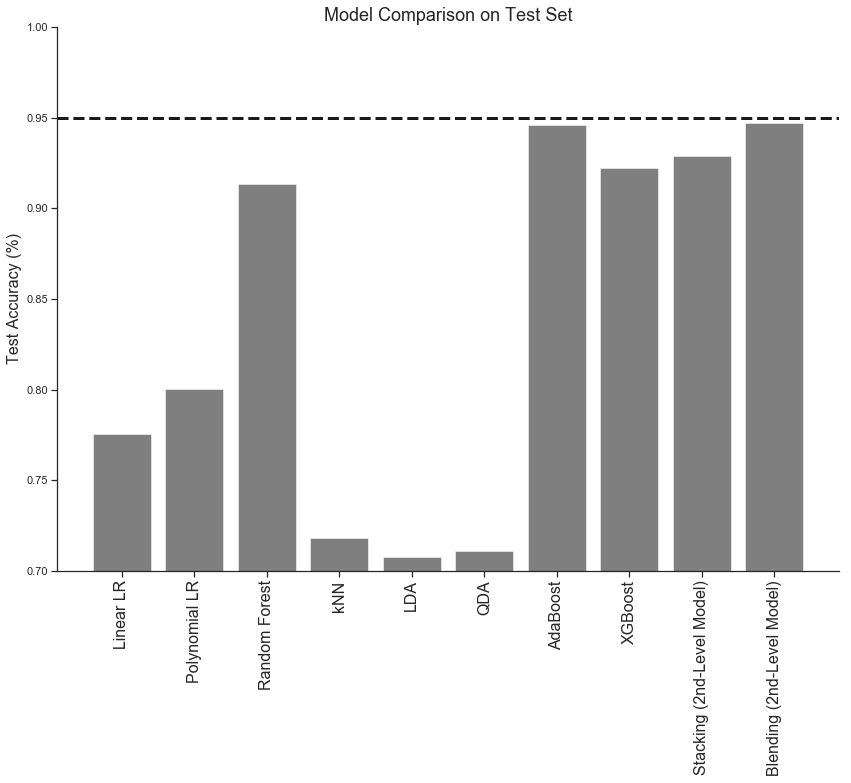

In [290]:
plt.figure(figsize=(14,10))
xx = range(len(df_var))
index_name=df_var.index
plt.bar(xx, df_var['test accuracy'], color='black', alpha=0.5)
plt.ylim(0.7,1)
plt.title('Model Comparison on Test Set', fontsize=18)
plt.ylabel('Test Accuracy (%)', fontsize=16)
plt.xticks(xx,index_name,rotation=90,fontsize = 16);
sns.despine()

plt.axhline(0.95, c='k', linewidth=3, linestyle='--');

The weighted stacked model performed the best on the test set, achieving an accuracy of 85.7%, a value more than 1% higher than that achieved by the other best models: logistic regression and random forest. With extra tuning of hyperparameters and model weightings it is likely that this could be increased further.

## Netrual network


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

import tensorflow.keras 
from tensorflow.keras import models
from tensorflow.keras import layers


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

from sklearn.metrics import r2_score as r2

from sklearn.utils import shuffle
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import tensorflow.contrib.eager as tfe
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [14]:
model_NN = models.Sequential()

model_NN.add(layers.Dense(1000, input_shape=(X_train_scaled.shape[1],),
                activation='relu'))

model_NN.add(layers.Dense(350, input_shape=(X_train_scaled.shape[1],),
                activation='relu', 
                kernel_regularizer=regularizers.l2(0.01)))
model_NN.add(Dropout(0.5))
           
model_NN.add(layers.Dense(350,   
                activation='relu', 
                kernel_regularizer=regularizers.l2(0.01)))
model_NN.add(Dropout(0.5))


model_NN.add(layers.Dense(1,  
                activation='sigmoid')) 

model_NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              14000     
_________________________________________________________________
dense_1 (Dense)              (None, 350)               350350    
_________________________________________________________________
dropout (Dropout)            (None, 350)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 350)               122850    
_________________________________________________________________
dropout_1 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 351       
Total params: 487,551
Trainable params: 487,551
Non-trainable params: 0
_________________________________________________________________


In [16]:
tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_NN.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [18]:
%%capture
ANN_history = model_NN.fit(X_train_scaled, Y_train,batch_size=128,epochs=3000,validation_split=0.2)

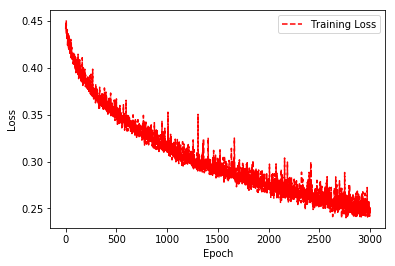

In [20]:
training_loss = ANN_history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

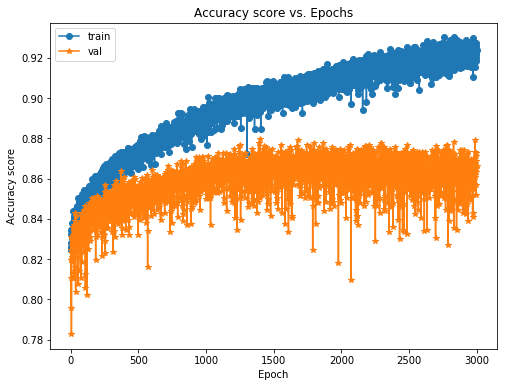

In [22]:
fig, axs = plt.subplots(figsize=(8, 6))
plt.plot(ANN_history.history['acc'], '-o', label='train')
plt.plot(ANN_history.history['val_acc'], '-*', label='val')

plt.ylabel("Accuracy score")
plt.xlabel("Epoch")
plt.title("Accuracy score vs. Epochs")

plt.legend()
plt.show() 

In [23]:
test_loss,test_acc = model_NN.evaluate(X_test_scaled, Y_test, verbose=1)
print('Test loss:', test_loss)
print('Test ACC:', test_acc)

3099/3099 [==============================] - 0s 88us/step
Test loss: 0.44289736228052284
Test ACC: 0.8725395289379845


### Steps for Further Improvement

As a closing remark it must be noted that the steps taken above just show a very simple way of producing an ensemble stacker. You hear of ensembles created at the highest level of Kaggle competitions which involves monstrous combinations of stacked classifiers as well as levels of stacking which go to more than 2 levels.

Some additional steps that may be taken to improve one's score could be:

- Implementing a good cross-validation strategy in training the models to find optimal parameter values
- Introduce a greater variety of base models for learning. The more uncorrelated the results, the better the final score.